In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import pycountry

In [40]:
ds= pd.read_csv("ds_salaries.csv")
ds.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [41]:
ds.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [42]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [43]:
ds["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [44]:
ds.groupby("company_size")["salary"].mean().round(2)

company_size
L    438794.37
M    150712.84
S    281430.10
Name: salary, dtype: float64

In [45]:
ds.groupby("job_title")["salary"].mean().round(2)

job_title
3D Computer Vision Researcher    120000.00
AI Developer                     137181.82
AI Programmer                     55000.00
AI Scientist                     275312.50
Analytics Engineer               151352.62
                                   ...    
Research Engineer                162752.81
Research Scientist               160768.89
Software Data Engineer            75000.00
Staff Data Analyst                15000.00
Staff Data Scientist             105000.00
Name: salary, Length: 93, dtype: float64

Text(0.5, 1.0, 'Top 10 highest paying job(salary in usd)')

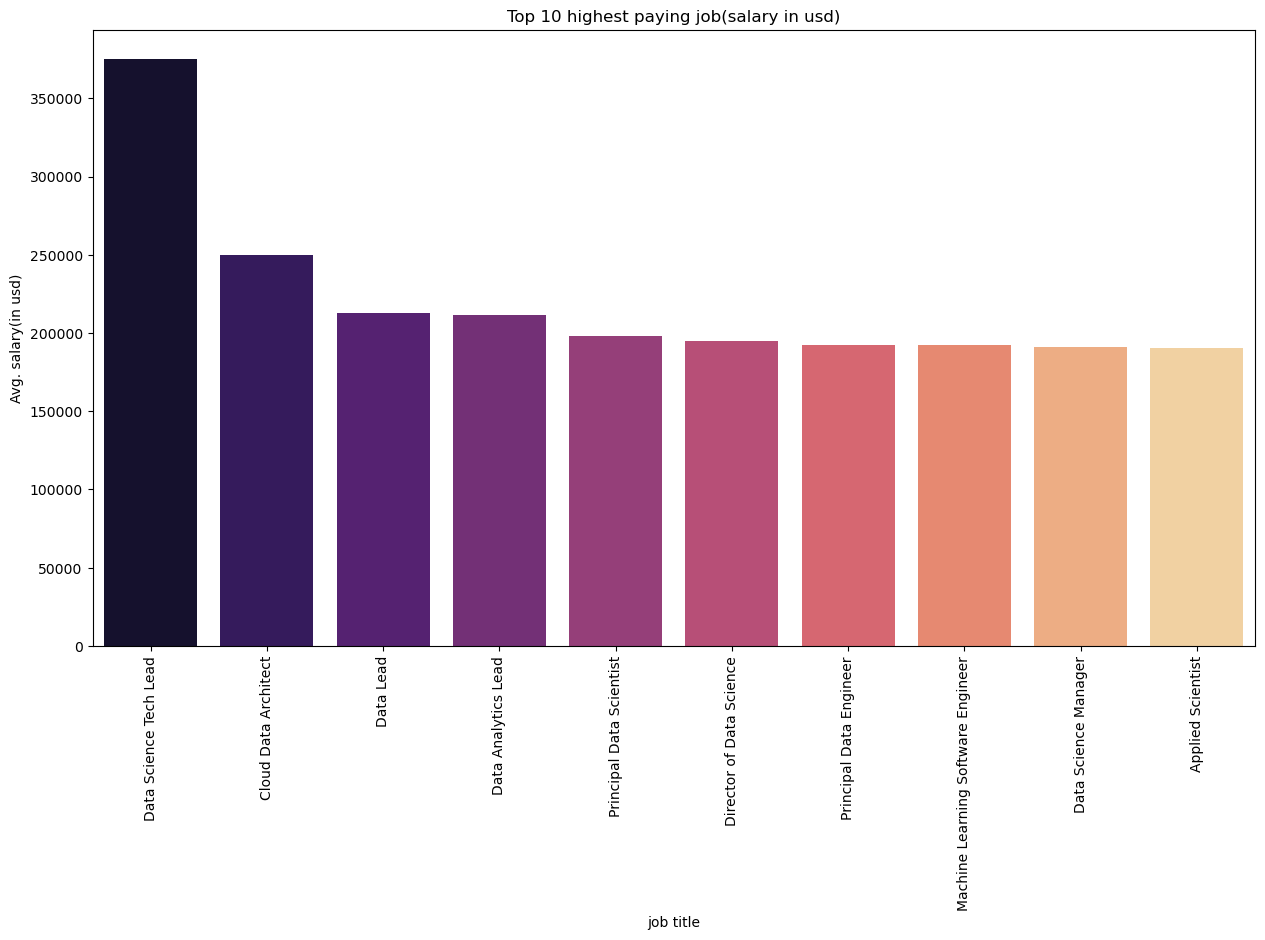

In [46]:
fig=plt.figure(figsize=(15,8))
#To observe top to highest paying DS jobs 
temp=ds.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).to_frame().iloc[:10]
temp.reset_index(inplace=True)
sns.barplot(x='job_title',y='salary_in_usd',data=temp,palette='magma')
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('Avg. salary(in usd)')
plt.title('Top 10 highest paying job(salary in usd)')

In [47]:
ds.groupby("experience_level")["salary"].mean().round(2)

experience_level
EN    188381.18
EX    246802.20
MI    248200.31
SE    170048.97
Name: salary, dtype: float64

<BarContainer object of 4 artists>

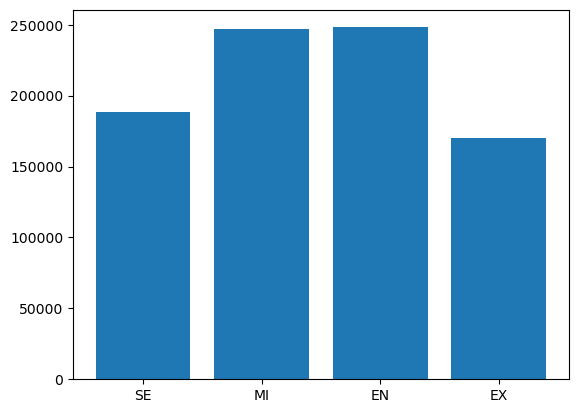

In [48]:
plt.bar(ds["experience_level"].unique(),ds.groupby("experience_level")["salary"].mean().round(2))

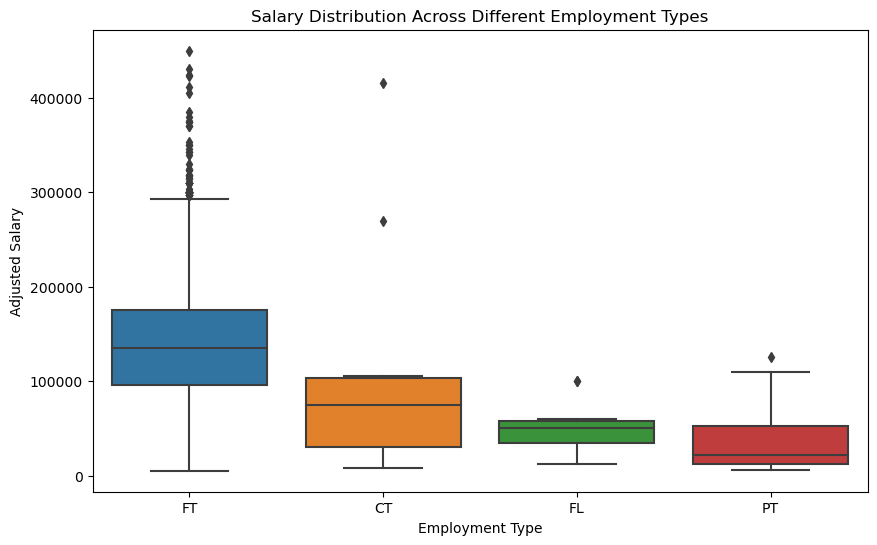

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ds, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Adjusted Salary')
plt.show()

C:\Users\cenkg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='salary_in_usd', ylabel='Density'>

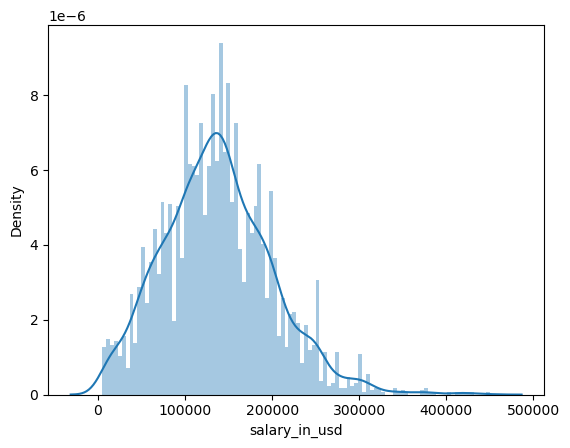

In [50]:
sns.distplot(ds["salary_in_usd"],bins=100)

In [51]:
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
    # Function to convert country code to full name
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

In [52]:


ds['company_location'] = ds['company_location'].apply(country_code_to_name)
ds['employee_residence'] = ds['employee_residence'].apply(country_code_to_name)

avg_salary_by_location = ds.groupby('company_location', as_index=False)['salary_in_usd'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='company_location',
                     color_continuous_scale="Viridis",
                     title='Average Salary by Company Location',
                     labels={'salary_in_usd': 'Average Adjusted Salary'},
                     projection='natural earth')

fig1.show()


Text(0.5, 1.0, 'Top 10 highest paying job(salary in usd)')

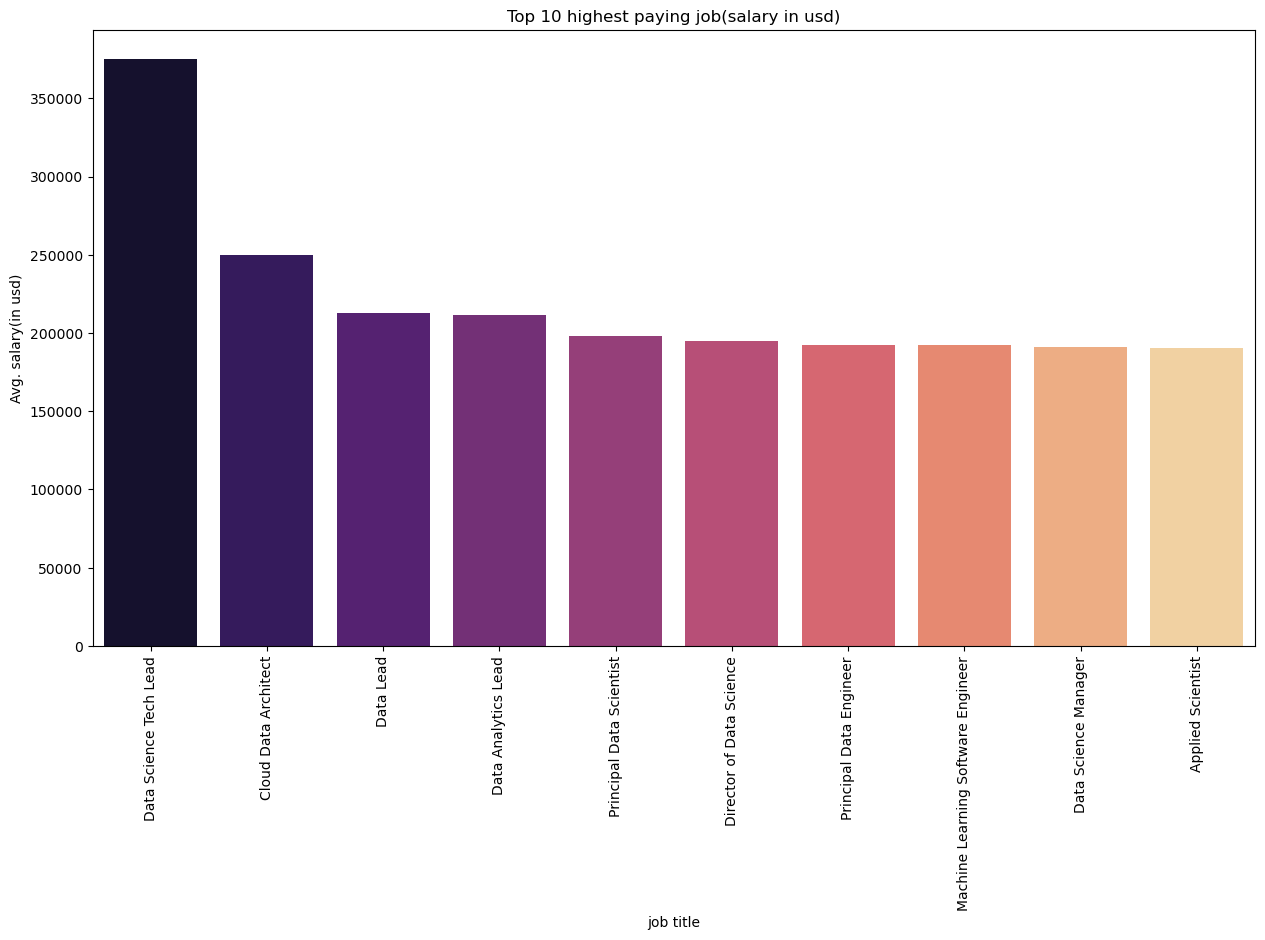

In [53]:
fig=plt.figure(figsize=(15,8))
#To observe top to highest paying DS jobs 
temp=ds.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).to_frame().iloc[:10]
temp.reset_index(inplace=True)
sns.barplot(x='job_title',y='salary_in_usd',data=temp,palette='magma')
plt.xticks(rotation=90)
plt.xlabel('job title')
plt.ylabel('Avg. salary(in usd)')
plt.title('Top 10 highest paying job(salary in usd)')

In [54]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
ds=pd.get_dummies(ds)

In [56]:
scaler=StandardScaler()
scaler.fit_transform(ds[['work_year','salary_in_usd','remote_ratio']])

array([[ 0.90599446, -0.82039118,  1.10591825],
       [ 0.90599446, -1.70618745,  1.10591825],
       [ 0.90599446, -1.77756251,  1.10591825],
       ...,
       [-3.43330297, -0.51660304,  1.10591825],
       [-3.43330297, -0.59590867,  1.10591825],
       [-1.9868705 , -0.68052777,  0.07674278]])

In [57]:
X=ds.drop(columns=["salary_in_usd", "salary"],axis=1)
y=ds['salary_in_usd']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()
forest.fit(X_train,y_train)


RandomForestRegressor()

In [59]:
y_pred=forest.predict(X_test)

In [60]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

36649.017225619384
2395671283.805658
0.39316139316766974


In [61]:
scores = cross_val_score(forest, X, y, cv=5) 
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

Cross-Validation Scores: [0.26611663 0.28589576 0.34644188 0.36899581 0.44628035]
Mean Score: 0.3427460864336352


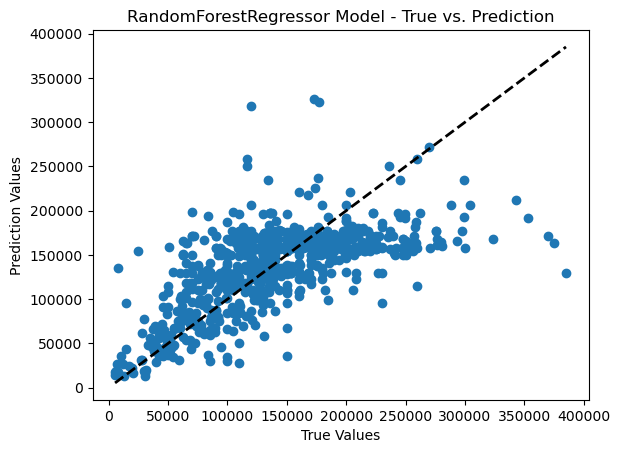

In [62]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  
plt.xlabel('True Values')
plt.ylabel('Prediction Values')
plt.title('RandomForestRegressor Model - True vs. Prediction')
plt.show()

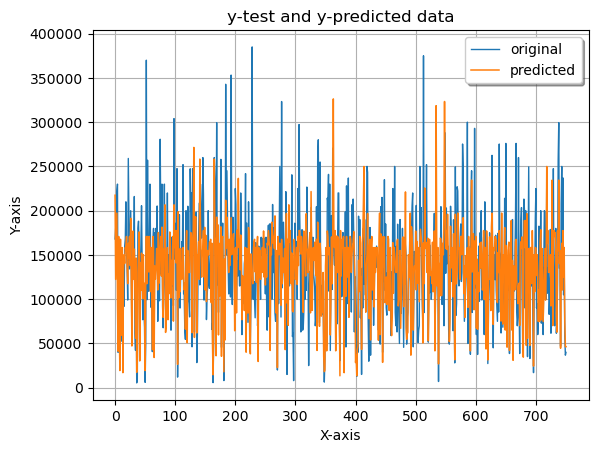

In [63]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend(loc="best",fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


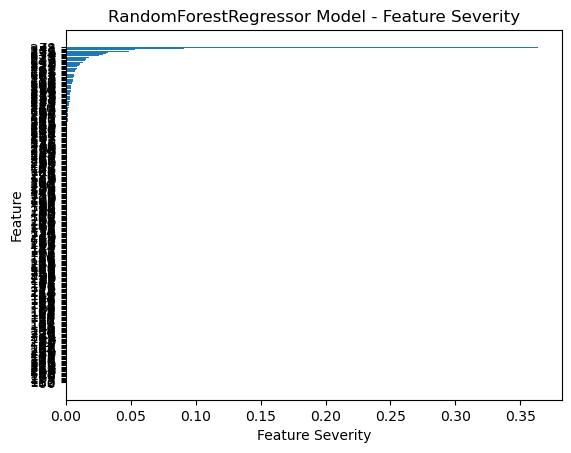

In [64]:
feature_importances = forest.feature_importances_

sorted_indices = np.argsort(feature_importances)
sorted_features = X_train.shape[1] - sorted_indices


plt.barh(range(X_train.shape[1]), feature_importances[sorted_indices], tick_label=sorted_features)
plt.xlabel("Feature Severity")
plt.ylabel("Feature")
plt.title("RandomForestRegressor Model - Feature Severity")
plt.show()

In [65]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [2, 4, 5, 10],  
    'min_samples_split': [3, 4, 5, 6, 8, 10]}

Grid = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5)
Grid.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 5, 10],
                         'min_samples_split': [3, 4, 5, 6, 8, 10],
                         'n_estimators': [100, 200, 300, 400]})

In [66]:
print(Grid.best_params_)

{'max_depth': 5, 'min_samples_split': 6, 'n_estimators': 300}


In [67]:
print(Grid.best_score_)

0.36257872202087676


In [68]:
best_params = Grid.best_params_
best_model = RandomForestRegressor(**best_params)
best_model.fit(X, y)

RandomForestRegressor(max_depth=5, min_samples_split=6, n_estimators=300)

In [69]:
best_y_pred= best_model.predict(X_test)

In [70]:
print(mean_absolute_error(y_test,best_y_pred))
print(mean_squared_error(y_test,best_y_pred))
print(r2_score(y_test,best_y_pred))

36518.22395496261
2292210980.7071676
0.41936853878866787
